In [110]:
import os
import h5py
from sklearn import metrics
#from microlearn.offloader import Offload
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.layers import Flatten
import pandas as pd 
data= pd.read_csv("wheat_data_summer.csv",index_col='Time IST')

In [111]:
data

,SM1,SM2,T,H,P,L
Time IST,,,,,,
03-03-2021 11:30,1547.988182,1386.097273,27.970909,83.089091,98348.58455,933.454545
03-03-2021 11:45,1550.385000,1397.823000,28.540000,80.534000,98328.40000,914.500000
03-03-2021 12:00,1554.245000,1402.921000,28.618000,75.564000,98313.49900,999.700000
03-03-2021 12:15,1554.242000,1405.282000,28.334000,75.861000,98300.42000,1528.400000
03-03-2021 12:30,1561.174545,1406.650000,28.835455,74.176364,98289.80455,1671.545455
...,...,...,...,...,...,...
4/16/2021 6:30,289.013333,177.260000,26.810000,40.530000,97821.90667,3092.666667
4/16/2021 6:45,289.850000,175.310000,28.250000,37.075000,97848.27500,3523.000000
4/16/2021 7:00,290.690000,173.430000,29.870000,33.565000,97865.09000,3972.000000


In [112]:
data.columns

Index(['SM1', 'SM2', 'T', 'H', 'P', 'L'], dtype='object')

In [113]:
null_pct = data.apply(pd.isnull).sum()/data.shape[0]
null_pct

SM1    0.0
SM2    0.0
T      0.0
H      0.0
P      0.0
L      0.0
dtype: float64

In [114]:
valid_columns= data.columns[null_pct < 0.5]

In [115]:
valid_columns

Index(['SM1', 'SM2', 'T', 'H', 'P', 'L'], dtype='object')

In [116]:
data=data[valid_columns].copy()

In [117]:
#data.columns= data.columns.str.lower()

In [118]:
data

,SM1,SM2,T,H,P,L
Time IST,,,,,,
03-03-2021 11:30,1547.988182,1386.097273,27.970909,83.089091,98348.58455,933.454545
03-03-2021 11:45,1550.385000,1397.823000,28.540000,80.534000,98328.40000,914.500000
03-03-2021 12:00,1554.245000,1402.921000,28.618000,75.564000,98313.49900,999.700000
03-03-2021 12:15,1554.242000,1405.282000,28.334000,75.861000,98300.42000,1528.400000
03-03-2021 12:30,1561.174545,1406.650000,28.835455,74.176364,98289.80455,1671.545455
...,...,...,...,...,...,...
4/16/2021 6:30,289.013333,177.260000,26.810000,40.530000,97821.90667,3092.666667
4/16/2021 6:45,289.850000,175.310000,28.250000,37.075000,97848.27500,3523.000000
4/16/2021 7:00,290.690000,173.430000,29.870000,33.565000,97865.09000,3972.000000


In [119]:
data= data.ffill()

In [120]:
data.apply(pd.isnull).sum()

SM1    0
SM2    0
T      0
H      0
P      0
L      0
dtype: int64

In [121]:
data.apply(lambda x: (x== 9999).sum())

SM1    0
SM2    0
T      0
H      0
P      0
L      0
dtype: int64

In [122]:
data.dtypes

SM1    float64
SM2    float64
T      float64
H      float64
P      float64
L      float64
dtype: object

In [123]:
data.index

Index(['03-03-2021 11:30', '03-03-2021 11:45', '03-03-2021 12:00',
       '03-03-2021 12:15', '03-03-2021 12:30', '03-03-2021 12:45',
       '03-03-2021 13:00', '03-03-2021 13:15', '03-03-2021 13:30',
       '03-03-2021 13:45',
       ...
       '4/16/2021 5:15', '4/16/2021 5:30', '4/16/2021 5:45', '4/16/2021 6:00',
       '4/16/2021 6:15', '4/16/2021 6:30', '4/16/2021 6:45', '4/16/2021 7:00',
       '4/16/2021 7:15', '4/16/2021 7:30'],
      dtype='object', name='Time IST', length=4213)

In [124]:
data.index= pd.to_datetime(data.index)

In [125]:
data.index.month.value_counts().sort_index()

3    2738
4    1475
Name: Time IST, dtype: int64

<AxesSubplot:xlabel='Time IST'>

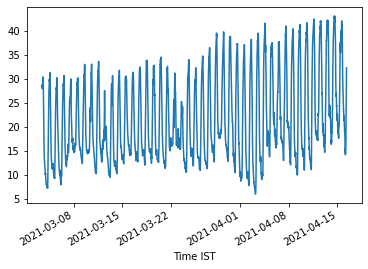

In [126]:
data['T'].plot()

In [127]:
data['target_temp']=data['T'].shift(-1)
data['target_hum']= data['H'].shift(-1)

In [128]:
data

,SM1,SM2,T,H,P,L,target_temp,target_hum
Time IST,,,,,,,,
2021-03-03 11:30:00,1547.988182,1386.097273,27.970909,83.089091,98348.58455,933.454545,28.540000,80.534000
2021-03-03 11:45:00,1550.385000,1397.823000,28.540000,80.534000,98328.40000,914.500000,28.618000,75.564000
2021-03-03 12:00:00,1554.245000,1402.921000,28.618000,75.564000,98313.49900,999.700000,28.334000,75.861000
2021-03-03 12:15:00,1554.242000,1405.282000,28.334000,75.861000,98300.42000,1528.400000,28.835455,74.176364
2021-03-03 12:30:00,1561.174545,1406.650000,28.835455,74.176364,98289.80455,1671.545455,28.465000,70.036000
...,...,...,...,...,...,...,...,...
2021-04-16 06:30:00,289.013333,177.260000,26.810000,40.530000,97821.90667,3092.666667,28.250000,37.075000
2021-04-16 06:45:00,289.850000,175.310000,28.250000,37.075000,97848.27500,3523.000000,29.870000,33.565000
2021-04-16 07:00:00,290.690000,173.430000,29.870000,33.565000,97865.09000,3972.000000,31.156667,31.716667


In [129]:
data= data.ffill()

In [130]:
data

,SM1,SM2,T,H,P,L,target_temp,target_hum
Time IST,,,,,,,,
2021-03-03 11:30:00,1547.988182,1386.097273,27.970909,83.089091,98348.58455,933.454545,28.540000,80.534000
2021-03-03 11:45:00,1550.385000,1397.823000,28.540000,80.534000,98328.40000,914.500000,28.618000,75.564000
2021-03-03 12:00:00,1554.245000,1402.921000,28.618000,75.564000,98313.49900,999.700000,28.334000,75.861000
2021-03-03 12:15:00,1554.242000,1405.282000,28.334000,75.861000,98300.42000,1528.400000,28.835455,74.176364
2021-03-03 12:30:00,1561.174545,1406.650000,28.835455,74.176364,98289.80455,1671.545455,28.465000,70.036000
...,...,...,...,...,...,...,...,...
2021-04-16 06:30:00,289.013333,177.260000,26.810000,40.530000,97821.90667,3092.666667,28.250000,37.075000
2021-04-16 06:45:00,289.850000,175.310000,28.250000,37.075000,97848.27500,3523.000000,29.870000,33.565000
2021-04-16 07:00:00,290.690000,173.430000,29.870000,33.565000,97865.09000,3972.000000,31.156667,31.716667


In [131]:
corelation=data.corr()
print(corelation)
corr_dataframe= pd.DataFrame(corelation)
corr_dataframe.to_csv('corelation.csv')

                  SM1       SM2         T         H         P         L  \
SM1          1.000000  0.959776 -0.229238  0.401754  0.330680 -0.205854   
SM2          0.959776  1.000000 -0.257318  0.505000  0.405445 -0.273563   
T           -0.229238 -0.257318  1.000000 -0.840894 -0.122520  0.784596   
H            0.401754  0.505000 -0.840894  1.000000  0.274404 -0.725692   
P            0.330680  0.405445 -0.122520  0.274404  1.000000 -0.070916   
L           -0.205854 -0.273563  0.784596 -0.725692 -0.070916  1.000000   
target_temp -0.230301 -0.258287  0.996164 -0.832561 -0.106811  0.793615   
target_hum   0.402074  0.504909 -0.843666  0.994157  0.262466 -0.735172   

             target_temp  target_hum  
SM1            -0.230301    0.402074  
SM2            -0.258287    0.504909  
T               0.996164   -0.843666  
H              -0.832561    0.994157  
P              -0.106811    0.262466  
L               0.793615   -0.735172  
target_temp     1.000000   -0.841046  
target_hum  

In [132]:
data.columns

Index(['SM1', 'SM2', 'T', 'H', 'P', 'L', 'target_temp', 'target_hum'], dtype='object')

# Models

In [133]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=0.1)
rr2= Ridge(alpha=0.1)
from sklearn.linear_model import LinearRegression
lr1= LinearRegression()
lr2= LinearRegression()
from sklearn import tree
clf= tree.DecisionTreeRegressor()
from sklearn import svm
svgr=svm.SVR()
from sklearn.ensemble import VotingRegressor
vreg=VotingRegressor(estimators=[('lr',lr1),('rr',rr1),('clf',clf),('svm',svgr)])

In [134]:
predictors= data.columns[data.columns.isin(['T','H'])]

In [135]:
predictors

Index(['T', 'H'], dtype='object')

In [136]:
data.iloc[:,[0,2,3,-2,-1]]

,SM1,T,H,target_temp,target_hum
Time IST,,,,,
2021-03-03 11:30:00,1547.988182,27.970909,83.089091,28.540000,80.534000
2021-03-03 11:45:00,1550.385000,28.540000,80.534000,28.618000,75.564000
2021-03-03 12:00:00,1554.245000,28.618000,75.564000,28.334000,75.861000
2021-03-03 12:15:00,1554.242000,28.334000,75.861000,28.835455,74.176364
2021-03-03 12:30:00,1561.174545,28.835455,74.176364,28.465000,70.036000
...,...,...,...,...,...
2021-04-16 06:30:00,289.013333,26.810000,40.530000,28.250000,37.075000
2021-04-16 06:45:00,289.850000,28.250000,37.075000,29.870000,33.565000
2021-04-16 07:00:00,290.690000,29.870000,33.565000,31.156667,31.716667


In [137]:
def backtest_for_temp_2_predictors(data, model, predictors, start=200, step=100):
    all_predictions = []
    j=0
    iterative_score=[]
    for i in range(start, data.shape[0], step):
        j=j+1
        train = data.iloc[:i,[2,3,-2]]
        test = data.iloc[i:(i+step),[2,3,-2]]
        model.fit(train[predictors], train['target_temp'])
        #print(model.coef_, model.intercept_)
        print(j,"--->",model.score(train[predictors],train['target_temp']))
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target_temp"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        combined["e_error"]= ((combined['actual'] - combined["prediction"]) /combined['prediction']).abs()
        iterative_score.append(model.score(train[predictors],train['target_temp']))
        df=pd.DataFrame(iterative_score)
        df.to_csv('model_accuracy_temp.csv')
        all_predictions.append(combined)  
             
    return pd.concat(all_predictions)

In [138]:
def backtest_for_temp_3_predictors(data, model, predictors, start=200, step=90):
    all_predictions = []
    j=0
    iterative_score=[]
    for i in range(start, data.shape[0], step):
        j=j+1
        train = data.iloc[:i,[0,2,3,-2]]
        test = data.iloc[i:(i+step),[0,2,3,-2]]
        model.fit(train[predictors], train['target_temp'])
        #print(model.coef_, model.intercept_)
        print(j,"--->",model.score(train[predictors],train['target_temp']))
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target_temp"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        combined["e_error"]= ((combined['actual'] - combined["prediction"]) /combined['prediction']).abs()
        all_predictions.append(combined)  
        iterative_score.append(model.score(train[predictors],train['target_temp']))
        df=pd.DataFrame(iterative_score)
        df.to_csv('model_accuracy_temp.csv')     
    return pd.concat(all_predictions)

In [139]:
import pickle
def backtest_for_hum(data, model, predictors, start=200, step=90):
    all_predictions = []
    j=0
    iterative_score=[]
    for i in range(start, data.shape[0], step):
        j=j+1
        train = data.iloc[:i,[2,3,-1]]
        test = data.iloc[i:(i+step),[2,3,-1]]
        model.fit(train[predictors], train['target_hum'])
        print(model.coef_, model.intercept_)
        print(j,"--->",model.score(train[predictors],train['target_hum']))
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target_hum"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        combined["e_error"]= ((combined['actual'] - combined["prediction"]) /combined['prediction']).abs()
        iterative_score.append(model.score(train[predictors],train['target_hum']))
        df=pd.DataFrame(iterative_score)
        df.to_csv('model_accuracy_hum.csv')
        all_predictions.append(combined)  
           
             
    return pd.concat(all_predictions)

# Linear Regression
### Train test split ratio 60%

In [140]:
from joblib import Parallel, delayed 
import joblib 
  
train = data.iloc[:2527,[2,3,-2]]
#print(train)
test = data.iloc[2528:,[2,3,-2]]
lr1.fit(train[predictors], train['target_temp'])
#print(lr1.coef_, lr1.intercept_)
print(lr1.score(train[predictors],train['target_temp']))
lr1.predict(test[predictors])
#save the model in pkl format
lr_model=joblib.dump(lr1,'lr1.pkl') 
lr1_from_pickle= joblib.load("lr1.pkl")
lr1_from_pickle.predict(test[predictors])

0.9913449483650237


array([20.04304197, 19.84422566, 19.4533326 , ..., 29.53075185,
       30.81700104, 31.92670345])

# Ridge Regression

In [141]:
from joblib import Parallel, delayed 
import joblib 
  
train = data.iloc[:2527,[2,3,-2]]
#print(train)
test = data.iloc[2528:,[2,3,-2]]
rr1.fit(train[predictors], train['target_temp'])
#print(lr1.coef_, lr1.intercept_)
print(rr1.score(train[predictors],train['target_temp']))
rr1.predict(test[predictors])
#save the model in pkl format
rr_model=joblib.dump(rr1,'rr1.pkl') 
rr1_from_pickle= joblib.load("rr1.pkl")
rr1_from_pickle.predict(test[predictors])

0.9913449483631867


array([20.04303318, 19.84421736, 19.45332525, ..., 29.53077629,
       30.81702391, 31.92672532])

# Decsion Tree

In [142]:
from joblib import Parallel, delayed 
import joblib 
  
train = data.iloc[:2527,[2,3,-2]]
#print(train)
test = data.iloc[2528:,[2,3,-2]]
clf.fit(train[predictors], train['target_temp'])
#print(lr1.coef_, lr1.intercept_)
print(clf.score(train[predictors],train['target_temp']))
rr1.predict(test[predictors])
#save the model in pkl format
clf_model=joblib.dump(clf,'clf.pkl') 
clf_from_pickle= joblib.load("clf.pkl")
clf_from_pickle.predict(test[predictors])

0.999758947806285


array([21.69      , 19.39      , 19.39      , ..., 28.735     ,
       28.48666667, 31.2575    ])

# SVM

In [143]:
from joblib import Parallel, delayed 
import joblib 
  
train = data.iloc[:2527,[2,3,-2]]
#print(train)
test = data.iloc[2528:,[2,3,-2]]
svgr.fit(train[predictors], train['target_temp'])
#print(lr1.coef_, lr1.intercept_)
print(svgr.score(train[predictors],train['target_temp']))
rr1.predict(test[predictors])
#save the model in pkl format
svgr_model=joblib.dump(svgr,'svgr.pkl') 
svgr_from_pickle= joblib.load("svgr.pkl")
svgr_from_pickle.predict(test[predictors])

0.988371197553736


array([19.79363177, 19.5964038 , 19.20882736, ..., 32.3498572 ,
       33.12012485, 33.75091659])

# Ensemble tree

In [144]:
from joblib import Parallel, delayed 
import joblib 
  
train = data.iloc[:2527,[2,3,-2]]
#print(train)
test = data.iloc[2528:,[2,3,-2]]
vreg.fit(train[predictors], train['target_temp'])
#print(lr1.coef_, lr1.intercept_)
print(vreg.score(train[predictors],train['target_temp']))
rr1.predict(test[predictors])
#save the model in pkl format
vreg_model=joblib.dump(vreg,'vreg.pkl') 
vreg_from_pickle= joblib.load("vreg.pkl")
vreg_from_pickle.predict(test[predictors])

0.9947735105062854


array([20.39242673, 19.66871171, 19.3763713 , ..., 30.03659634,
       30.81020412, 32.21546134])

In [145]:
print(data)

                             SM1          SM2          T          H  \
Time IST                                                              
2021-03-03 11:30:00  1547.988182  1386.097273  27.970909  83.089091   
2021-03-03 11:45:00  1550.385000  1397.823000  28.540000  80.534000   
2021-03-03 12:00:00  1554.245000  1402.921000  28.618000  75.564000   
2021-03-03 12:15:00  1554.242000  1405.282000  28.334000  75.861000   
2021-03-03 12:30:00  1561.174545  1406.650000  28.835455  74.176364   
...                          ...          ...        ...        ...   
2021-04-16 06:30:00   289.013333   177.260000  26.810000  40.530000   
2021-04-16 06:45:00   289.850000   175.310000  28.250000  37.075000   
2021-04-16 07:00:00   290.690000   173.430000  29.870000  33.565000   
2021-04-16 07:15:00   291.426667   170.436667  31.156667  31.716667   
2021-04-16 07:30:00   292.135000   167.500000  32.270000  29.700000   

                               P            L  target_temp  target_hum  
Tim

In [191]:
print("*********** Decision Tree Classifier ***************")
prediction_clf_temp= backtest_for_temp_2_predictors(data,clf,predictors)

*********** Decision Tree Classifier ***************
1 ---> 1.0
2 ---> 1.0
3 ---> 0.9999967559283085
4 ---> 0.9999944329145728
5 ---> 0.9999953101724125
6 ---> 0.9999162371991002
7 ---> 0.9999285223688795
8 ---> 0.9999258093859131
9 ---> 0.9999203658755239
10 ---> 0.999928259983697
11 ---> 0.9998556494716432
12 ---> 0.9998596112527448
13 ---> 0.9998606124665882
14 ---> 0.9998367311369913
15 ---> 0.9998133037988882
16 ---> 0.9998286980436724
17 ---> 0.9998305663861974
18 ---> 0.9998107017555565
19 ---> 0.9998067925552282
20 ---> 0.9998012974462058
21 ---> 0.999783167348476
22 ---> 0.9997675121651927
23 ---> 0.9997556892927593
24 ---> 0.999749000310681
25 ---> 0.9997561407741729
26 ---> 0.9997626632728803
27 ---> 0.999778275296453
28 ---> 0.9997715683904111
29 ---> 0.9997590697844222
30 ---> 0.9997553053995727
31 ---> 0.9997592161987483
32 ---> 0.9997660782584642
33 ---> 0.9997649081948039
34 ---> 0.9997554707760632
35 ---> 0.999754457628937
36 ---> 0.9997671964169057
37 ---> 0.999774122

In [190]:
print("*********** SVM regressor ***************")
prediction_svm_temp= backtest_for_temp_2_predictors(data,svgr,predictors)

*********** SVM regressor ***************
1 ---> 0.9268500426087682
2 ---> 0.9597271154018435
3 ---> 0.9744634165123155
4 ---> 0.981115449963945
5 ---> 0.9848157349465995
6 ---> 0.9851450479521656
7 ---> 0.9863470590829028
8 ---> 0.9853290151421611
9 ---> 0.9853752677934411
10 ---> 0.9859615053483257
11 ---> 0.986504349238538
12 ---> 0.9867815331030123
13 ---> 0.9869066466524105
14 ---> 0.9869391855844213
15 ---> 0.987079850470855
16 ---> 0.987322881308154
17 ---> 0.9873021661902611
18 ---> 0.9870259006505566
19 ---> 0.9874951703860229
20 ---> 0.9876898009197009
21 ---> 0.9876325922438384
22 ---> 0.9878604588153462
23 ---> 0.9879943298558964
24 ---> 0.98823532303481
25 ---> 0.9886735140794422
26 ---> 0.9892466767148183
27 ---> 0.9892997276650259
28 ---> 0.9893100612234917
29 ---> 0.9890704735312172
30 ---> 0.9892658258453608
31 ---> 0.9895927953086725
32 ---> 0.989817057916378
33 ---> 0.9900122747820679
34 ---> 0.9900487856859146
35 ---> 0.9903944178080127
36 ---> 0.9906481988569441
37

In [192]:
print("*********** Voting regressor ***************")
prediction_vreg_temp= backtest_for_temp_2_predictors(data,vreg,predictors)

*********** Voting regressor ***************
1 ---> 0.9918243258137666
2 ---> 0.9939044318038309
3 ---> 0.9944471498488453
4 ---> 0.9947274635961056
5 ---> 0.9950135285526989
6 ---> 0.994643688954302
7 ---> 0.994830716371082
8 ---> 0.9942166641332424
9 ---> 0.9941170759006543
10 ---> 0.9942987699719694
11 ---> 0.9943476352131758
12 ---> 0.9944757208607987
13 ---> 0.9945699318266706
14 ---> 0.9945751021056312
15 ---> 0.9945431325599697
16 ---> 0.9946775479173721
17 ---> 0.9946392974709644
18 ---> 0.9943428727194977
19 ---> 0.9943724994456543
20 ---> 0.9943932474868697
21 ---> 0.9943603065397691
22 ---> 0.9944376351763596
23 ---> 0.9945238917263796
24 ---> 0.99468786182
25 ---> 0.9948453365424471
26 ---> 0.9950084165643278
27 ---> 0.9950974223890977
28 ---> 0.9951215173230272
29 ---> 0.9951451959611671
30 ---> 0.9951534273877463
31 ---> 0.9951726024871249
32 ---> 0.9951747298408588
33 ---> 0.9952316785260625
34 ---> 0.9952450447419239
35 ---> 0.9953082665236985
36 ---> 0.9953651616990666

In [194]:
#print('***********temp**************')
#predictions_rr_temp2= backtest_for_temp_2_predictors(data,rr1,predictors)
#print('*****************************')
predictions_lr_temp2= backtest_for_temp_2_predictors(data,lr1,predictors)
#print('***********Hum**************')
#predictions_rr_Hum= backtest_for_hum(data,rr2,predictors)
#print('*************************')
#predictions_lr_Hum= backtest_for_hum(data,lr2,predictors)



1 ---> 0.9926846436281086
2 ---> 0.9927904787285319
3 ---> 0.99208815427267
4 ---> 0.9918335374620354
5 ---> 0.9918916126776032
6 ---> 0.991182465608251
7 ---> 0.9913605814671066
8 ---> 0.9903003888708668
9 ---> 0.9901576915195051
10 ---> 0.9904562348992134
11 ---> 0.9905305259507908
12 ---> 0.9907601131056626
13 ---> 0.9909584675239856
14 ---> 0.9909939566077978
15 ---> 0.9909201604817041
16 ---> 0.9912003251056727
17 ---> 0.991139532048688
18 ---> 0.9905852534170914
19 ---> 0.9905893373508667
20 ---> 0.9906290606165846
21 ---> 0.9905666251087929
22 ---> 0.9907109289300947
23 ---> 0.9909111377233148
24 ---> 0.9912041316275456
25 ---> 0.9914517739401548
26 ---> 0.991587588432297
27 ---> 0.9916898843551378
28 ---> 0.9917522356011806
29 ---> 0.9919073014522813
30 ---> 0.9919269471415575
31 ---> 0.9919242776490325
32 ---> 0.9918842286911501
33 ---> 0.9919739877755582
34 ---> 0.992009704273165
35 ---> 0.9920999307145236
36 ---> 0.9921713413194054
37 ---> 0.9922455193620144
38 ---> 0.992345

In [150]:
print('***********temp**************')
predictions_rr_temp3= backtest_for_temp_3_predictors(data,rr1,predictors)
print('*****************************')
predictions_lr_temp3= backtest_for_temp_3_predictors(data,lr1,predictors)
#print('***********Hum**************')
#predictions_rr_Hum= backtest_for_hum(data,rr2,predictors)
#print('*************************')
#predictions_lr_Hum= backtest_for_hum(data,lr2,predictors)
iterative=[]
for j in predictions_rr_temp3:
    iterative.append(j)
print(iterative)    


***********temp**************
1 ---> 0.9926846434509653
2 ---> 0.9923304568834347
3 ---> 0.9918282689180189
4 ---> 0.9911710868294237
5 ---> 0.9916701731851333
6 ---> 0.9918176468956127
7 ---> 0.9914038382220767
8 ---> 0.9914152012079018
9 ---> 0.9904551676884132
10 ---> 0.9902271769966033
11 ---> 0.9904562348903576
12 ---> 0.9905223947528466
13 ---> 0.9907238324072749
14 ---> 0.9909412845076705
15 ---> 0.9910976056300448
16 ---> 0.9910267896137167
17 ---> 0.9910255043911403
18 ---> 0.9911185643568661
19 ---> 0.9910888565589712
20 ---> 0.9905979760327721
21 ---> 0.9905893373476582
22 ---> 0.9907034218293888
23 ---> 0.9906720081881228
24 ---> 0.9908041250433587
25 ---> 0.990959748189993
26 ---> 0.9911498471055943
27 ---> 0.991335306719332
28 ---> 0.9916050276923531
29 ---> 0.9915738479966603
30 ---> 0.9916555269783658
31 ---> 0.9917522356001913
32 ---> 0.9919029575032667
33 ---> 0.9919063305978796
34 ---> 0.9918129179139946
35 ---> 0.9918545561605783
36 ---> 0.9918246576158962
37 ---> 0

In [151]:
print(predictions_lr_temp2)
print('****************')
print(predictions_rr_temp2)
print('******************')
print(predictions_lr_temp3)
print('********************')
print(predictions_rr_temp3)

                        actual  prediction      diff   e_error
Time IST                                                      
2021-03-05 13:30:00  29.477143   28.452474  1.024669  0.036013
2021-03-05 13:45:00  29.722500   29.280117  0.442383  0.015109
2021-03-05 14:00:00  30.075000   29.437187  0.637813  0.021667
2021-03-05 14:15:00  30.197500   29.730669  0.466831  0.015702
2021-03-05 14:30:00  29.902857   29.821475  0.081383  0.002729
...                        ...         ...       ...       ...
2021-04-16 06:30:00  28.250000   26.671007  1.578993  0.059203
2021-04-16 06:45:00  29.870000   28.108628  1.761372  0.062663
2021-04-16 07:00:00  31.156667   29.727998  1.428669  0.048058
2021-04-16 07:15:00  32.270000   31.019264  1.250736  0.040321
2021-04-16 07:30:00  32.270000   32.134311  0.135689  0.004223

[4013 rows x 4 columns]
****************
                        actual  prediction      diff   e_error
Time IST                                                      
2021-03-05 13

In [152]:
print('***********RR-temp2***************')
print(predictions_rr_temp2['diff'].max())
print(predictions_rr_temp2['diff'].min())
print(predictions_rr_temp2['diff'].mean())
print(predictions_rr_temp2['diff'].var())
print(predictions_rr_temp2['diff'].std())
print('***********RR-Hum2***************')
print(predictions_rr_Hum['diff'].max())
print(predictions_rr_Hum['diff'].min())
print(predictions_rr_Hum['diff'].mean())
print(predictions_rr_Hum['diff'].var())
print(predictions_rr_Hum['diff'].std())
print('***********LR-Temp2***************')
print(predictions_lr_Hum['diff'].max())
print(predictions_lr_Hum['diff'].min())
print(predictions_lr_Hum['diff'].mean())
print(predictions_lr_Hum['diff'].var())
print(predictions_lr_Hum['diff'].std())
print('***********LR-Hum2***************')
print(predictions_lr_temp2['diff'].max())
print(predictions_lr_temp2['diff'].min())
print(predictions_lr_temp2['diff'].mean())
print(predictions_lr_temp2['diff'].var())
print(predictions_lr_temp2['diff'].std())

***********RR-temp2***************
3.9928815460216427
4.6362041803860166e-05
0.5802246355966363
0.27757135320505444
0.5268504087547569
***********RR-Hum2***************
28.635755354969845
0.0003677985849623866
1.7139842639230476
7.4086132230085235
2.721876783215677
***********LR-Temp2***************
28.635755466995363
0.00036659213972889404
1.7139809159550499
7.408621788265077
2.7218783566252696
***********LR-Hum2***************
3.9928837963773347
5.324166101772221e-05
0.5802240483823599
0.27757274371450874
0.5268517283966228


In [153]:
print('***********RR-temp3***************')
print(predictions_rr_temp3['diff'].max())
print(predictions_rr_temp3['diff'].min())
print(predictions_rr_temp3['diff'].mean())
print(predictions_rr_temp3['diff'].var())
print(predictions_rr_temp3['diff'].std())
print('***********LR-Temp3***************')
print(predictions_lr_temp3['diff'].max())
print(predictions_lr_temp3['diff'].min())
print(predictions_lr_temp3['diff'].mean())
print(predictions_lr_temp3['diff'].var())
print(predictions_lr_temp3['diff'].std())

***********RR-temp3***************
3.9931310417754666
0.0001636654980252672
0.5798968498049677
0.2781794001606536
0.5274271515201446
***********LR-Temp3***************
3.9931332585572683
0.00017224673670668267
0.5798962292382629
0.2781807400757691
0.5274284217557574


In [154]:
print(prediction_clf_temp)
print('****************')

                        actual  prediction      diff   e_error
Time IST                                                      
2021-03-05 13:30:00  29.477143   26.096667  3.380476  0.129537
2021-03-05 13:45:00  29.722500   29.609000  0.113500  0.003833
2021-03-05 14:00:00  30.075000   30.359000  0.284000  0.009355
2021-03-05 14:15:00  30.197500   30.626667  0.429167  0.014013
2021-03-05 14:30:00  29.902857   30.234000  0.331143  0.010953
...                        ...         ...       ...       ...
2021-04-16 06:30:00  28.250000   25.543333  2.706667  0.105964
2021-04-16 06:45:00  29.870000   26.773333  3.096667  0.115662
2021-04-16 07:00:00  31.156667   30.545000  0.611667  0.020025
2021-04-16 07:15:00  32.270000   31.040000  1.230000  0.039626
2021-04-16 07:30:00  32.270000   33.143333  0.873333  0.026350

[4013 rows x 4 columns]
****************


In [155]:
print('***********Decision tree-temp***************')
print(prediction_clf_temp['diff'].max())
print(prediction_clf_temp['diff'].min())
print(prediction_clf_temp['diff'].mean())
print(prediction_clf_temp['diff'].var())
print(prediction_clf_temp['diff'].std())

***********Decision tree-temp***************
4.419333330000001
0.0
0.801596056474789
0.6287759574464078
0.7929539440890674


In [156]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions_rr_temp2['actual'],predictions_rr_temp2['prediction'])

0.5802246355966341

In [157]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions_lr_temp2['actual'],predictions_lr_temp2['prediction'])

0.5802240483823585

In [158]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(prediction_clf_temp['actual'],prediction_clf_temp['prediction'])

0.8015960564747902

In [159]:
data2= pd.read_csv('modified_soil_data1_final.csv',index_col='Time IST')


In [160]:
data2

,New_temp,New_humi,New_sm1,New_sm2,New_p,New_l
Time IST,,,,,,
03-03-2021 11:30,28,83,1548,1386,98349,933
03-03-2021 11:45,29,81,1550,1398,98328,914
03-03-2021 12:00,29,76,1554,1403,98313,1000
03-03-2021 12:15,28,76,1554,1405,98300,1528
03-03-2021 12:30,29,74,1561,1407,98290,1672
...,...,...,...,...,...,...
4/16/2021 6:30,27,41,289,177,97822,3093
4/16/2021 6:45,28,37,290,175,97848,3523
4/16/2021 7:00,30,34,291,173,97865,3972


In [161]:
import numpy as np
noise1=np.random.normal(1,2,4213)
noise2= np.random.normal(1.5,1.5,4213)
noise_states=[]
for n in range(0,5,2):
    for j in range(1,5,2):
      noise= np.random.normal(n,j,4213)
      
      noise_states.append(noise)
     
print(noise_states[2])

cols=[]
for i in range(0,6):
   cols.append(data2.iloc[:,i]+noise_states[i])
combined_= pd.concat(cols,axis=1)
combined_.columns= ["alt_temp","alt_Hum","alt_sm1","alt_sm2","alt_P","alt_L"]
df=pd.DataFrame(combined_)
df.to_csv("Data_with_noise.csv")
combined_.iloc[:,[0,1]]
print(combined_)

[3.19187823 1.35756771 1.32317834 ... 2.38909553 2.4362648  2.26768294]
                   alt_temp    alt_Hum      alt_sm1      alt_sm2  \
Time IST                                                           
03-03-2021 11:30  28.120766  78.841158  1551.191878  1391.005838   
03-03-2021 11:45  27.835807  83.146869  1551.357568  1398.717913   
03-03-2021 12:00  30.949395  76.209725  1555.323178  1405.233577   
03-03-2021 12:15  26.550339  80.681165  1556.113158  1401.116112   
03-03-2021 12:30  27.556068  74.161428  1563.555319  1409.315227   
...                     ...        ...          ...          ...   
4/16/2021 6:30    27.943567  41.396631   288.200799   175.562056   
4/16/2021 6:45    27.752750  37.218887   292.680213   178.740169   
4/16/2021 7:00    29.907405  31.286580   293.389096   174.876131   
4/16/2021 7:15    30.884974  33.292628   293.436265   171.127826   
4/16/2021 7:30    31.659155  34.740606   294.267683   168.444398   

                         alt_P        alt_L

In [162]:
temp_test= data2.iloc[:,[0,1]]
test1=data2.iloc[1,[0,1]]
preds=lr2.predict([test1])
print(temp_test)
print(test1)
print(preds)

                  New_temp  New_humi
Time IST                            
03-03-2021 11:30        28        83
03-03-2021 11:45        29        81
03-03-2021 12:00        29        76
03-03-2021 12:15        28        76
03-03-2021 12:30        29        74
...                    ...       ...
4/16/2021 6:30          27        41
4/16/2021 6:45          28        37
4/16/2021 7:00          30        34
4/16/2021 7:15          31        32
4/16/2021 7:30          32        30

[4213 rows x 2 columns]
New_temp    29
New_humi    81
Name: 03-03-2021 11:45, dtype: int64
[80.22793655]


In [163]:
#----------------------------------------------------------------
preds1=lr1.predict(combined_.iloc[:,[0,1]])
preds2=lr2.predict(combined_.iloc[:,[0,1]])
preds1 = pd.Series(preds1, index=temp_test.index)
preds2 = pd.Series(preds2, index=temp_test.index)
#-----------------------------------------------------------------
preds3= clf.predict(combined_.iloc[:,[0,1]])
preds3 = pd.Series(preds3, index=temp_test.index)
#-----------------------------------------------------------------
preds4= svgr.predict(combined_.iloc[:,[0,1]])
preds4 = pd.Series(preds4, index=temp_test.index)
#-----------------------------------------------------------------
preds5= vreg.predict(combined_.iloc[:,[0,1]])
preds5 = pd.Series(preds5, index=temp_test.index)
#-----------------------------------------------------------------
#print(preds)
#combined= pd.concat([temp_test,preds],axis=1)
#combined.columns = ["actual_temp_LR", "actual_hum_LR","Predicted_temp_LR"]
#combined["diff"] = (combined["Predicted_temp"] - combined["actual_temp"]).abs()
#print(combined)
predsr1=rr1.predict(combined_.iloc[:,[0,1]])
predsr2=rr2.predict(combined_.iloc[:,[0,1]])
predsr1 = pd.Series(predsr1, index=temp_test.index)
predsr2 = pd.Series(predsr2, index=temp_test.index)
#------------------------------------------------------------------
#print(predsr)
combined= pd.concat([combined_,preds1,preds2,predsr1,predsr2,preds3,preds4,preds5],axis=1)
combined.columns = ["actual_temp", "actual_hum","Actual_SM1","Actual_SM2","L","P","Predicted_temp_LR","Predicted_Hum_LR","Predicted_temp_RR","Predicted_Hum_RR","Predicted_temp_clf","Predicted_temp_svm","Predicted_temp_vreg"]
combined["diff_temp_LR"] = (combined["Predicted_temp_LR"] - combined["actual_temp"]).abs()
combined["diff_Hum_RR"] = (combined["Predicted_Hum_RR"] - combined["actual_hum"]).abs()
combined["diff_Hum_LR"] = (combined["Predicted_Hum_LR"] - combined["actual_hum"]).abs()
combined["diff_Temp_RR"] = (combined["Predicted_temp_RR"] - combined["actual_temp"]).abs()
combined["diff_Temp_clf"] = (combined["Predicted_temp_clf"] - combined["actual_temp"]).abs()
combined["diff_Temp_svm"] = (combined["Predicted_temp_svm"] - combined["actual_temp"]).abs()
combined["diff_Temp_vreg"] = (combined["Predicted_temp_vreg"] - combined["actual_temp"]).abs()
combined["e_error_temp_RR"]= ((combined['actual_temp'] - combined["Predicted_temp_RR"]) /combined['Predicted_temp_RR']).abs()
combined["e_error_Hum_RR"]= ((combined['actual_hum'] - combined["Predicted_Hum_RR"]) /combined['Predicted_Hum_RR']).abs()
combined["e_error_temp_LR"]= ((combined['actual_temp'] - combined["Predicted_temp_LR"]) /combined['Predicted_temp_LR']).abs()
combined["e_error_Hum_LR"]= ((combined['actual_hum'] - combined["Predicted_Hum_LR"]) /combined['Predicted_Hum_LR']).abs()
combined["e_error_temp_clf"]= ((combined['actual_temp'] - combined["Predicted_temp_clf"]) /combined['Predicted_temp_clf']).abs()
combined["e_error_temp_svm"]= ((combined['actual_temp'] - combined["Predicted_temp_svm"]) /combined['Predicted_temp_svm']).abs()
combined["e_error_temp_vreg"]= ((combined['actual_temp'] - combined["Predicted_temp_vreg"]) /combined['Predicted_temp_vreg']).abs()
print(combined)
df=pd.DataFrame(combined)
df.to_csv('prediction_with_noise.csv')

                  actual_temp  actual_hum   Actual_SM1   Actual_SM2  \
Time IST                                                              
03-03-2021 11:30    28.120766   78.841158  1551.191878  1391.005838   
03-03-2021 11:45    27.835807   83.146869  1551.357568  1398.717913   
03-03-2021 12:00    30.949395   76.209725  1555.323178  1405.233577   
03-03-2021 12:15    26.550339   80.681165  1556.113158  1401.116112   
03-03-2021 12:30    27.556068   74.161428  1563.555319  1409.315227   
...                       ...         ...          ...          ...   
4/16/2021 6:30      27.943567   41.396631   288.200799   175.562056   
4/16/2021 6:45      27.752750   37.218887   292.680213   178.740169   
4/16/2021 7:00      29.907405   31.286580   293.389096   174.876131   
4/16/2021 7:15      30.884974   33.292628   293.436265   171.127826   
4/16/2021 7:30      31.659155   34.740606   294.267683   168.444398   

                             L            P  Predicted_temp_LR  \
Time IST  

# Offloading the ML Models

In [164]:
from microlearn.microlearn.offloader import Offload
off = Offload(lr1)
off.export_to_arduino('LR_offload.ino')

In [166]:
#lr1.save("LR")

In [169]:
#import tensorflow as tf
## Convert the model to the TensorFlow Lite format without quantization
#converter = tf.lite.TFLiteConverter.from_keras_model(lr1)
#tflite_model = converter.convert()
#
## Save the model to disk
#open("LR.tflite", "wb").write(tflite_model)
#  
#import os
#basic_model_size = os.path.getsize("LR.tflite")
#print("Model is %d bytes" % basic_model_size)

In [170]:
import pandas as pd
graph_data= pd.read_csv("prediction_with_noise.csv")
graph_data

,Time IST,actual_temp,actual_hum,Actual_SM1,Actual_SM2,L,P,Predicted_temp_LR,Predicted_Hum_LR,Predicted_temp_RR,...,diff_Temp_clf,diff_Temp_svm,diff_Temp_vreg,e_error_temp_RR,e_error_Hum_RR,e_error_temp_LR,e_error_Hum_LR,e_error_temp_clf,e_error_temp_svm,e_error_temp_vreg
0,03-03-2021 11:30,28.120766,78.841158,1551.191878,1391.005838,98352.091091,936.800868,28.202462,78.204474,28.202455,...,0.510345,0.288535,0.241663,0.002897,0.008141,0.002897,0.008141,0.017825,0.010156,0.008521
1,03-03-2021 11:45,27.835807,83.146869,1551.357568,1398.717913,98331.294632,916.726133,27.936989,82.416322,27.936981,...,0.754193,0.268090,0.295080,0.003621,0.008864,0.003622,0.008864,0.026380,0.009539,0.010490
2,03-03-2021 12:00,30.949395,76.209725,1555.323178,1405.233577,98315.278192,1009.963026,31.047971,75.401041,31.047962,...,0.912728,0.216202,0.123247,0.003175,0.010725,0.003175,0.010725,0.030387,0.006937,0.003998
3,03-03-2021 12:15,26.550339,80.681165,1556.113158,1401.116112,98304.401238,1534.618418,26.624651,80.129542,26.624644,...,0.570339,0.272458,0.036463,0.002791,0.006884,0.002791,0.006884,0.021953,0.010158,0.001375
4,03-03-2021 12:30,27.556068,74.161428,1563.555319,1409.315227,98294.736686,1677.049490,27.607102,73.702315,27.607097,...,0.931068,0.264195,0.140688,0.001848,0.006229,0.001849,0.006229,0.034970,0.009497,0.005132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,4/16/2021 6:30,27.943567,41.396631,288.200799,175.562056,97825.518516,3097.318462,27.827006,41.805665,27.827009,...,0.729766,0.046536,0.110110,0.004189,0.009784,0.004189,0.009784,0.025451,0.001668,0.003925
4209,4/16/2021 6:45,27.752750,37.218887,292.680213,178.740169,97851.707728,3525.942988,27.612215,37.759372,27.612219,...,0.477750,0.033193,0.184261,0.005089,0.014314,0.005090,0.014314,0.017516,0.001195,0.006684
4210,4/16/2021 7:00,29.907405,31.286580,293.389096,174.876131,97868.777861,3977.836720,29.759133,31.804135,29.759136,...,0.990738,0.272263,0.158257,0.004982,0.016273,0.004982,0.016273,0.034262,0.009021,0.005320
4211,4/16/2021 7:15,30.884974,33.292628,293.436265,171.127826,97875.879009,3531.527932,30.757823,33.670512,30.757825,...,1.384974,0.223203,0.356411,0.004134,0.011223,0.004134,0.011223,0.046948,0.007175,0.011675


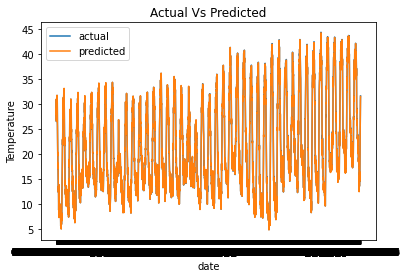

In [171]:
date=graph_data.iloc[:,0]
actual= graph_data.iloc[:,1]
predicted= graph_data.iloc[:,7]
#print(actual)
#print(predicted)
plt.plot(date, actual, label='actual')
plt.plot(date, predicted, label='predicted')
#plt.figure(figsize=(10, 6))
plt.xlabel('date')
plt.ylabel('Temperature')
plt.title('Actual Vs Predicted')

plt.legend()
plt.savefig("Accuracy_Vs_predicted.png")
plt.show()

No handles with labels found to put in legend.


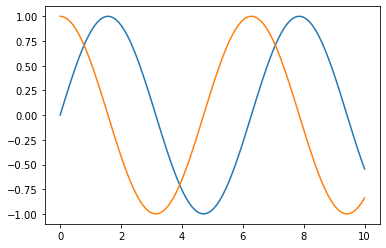

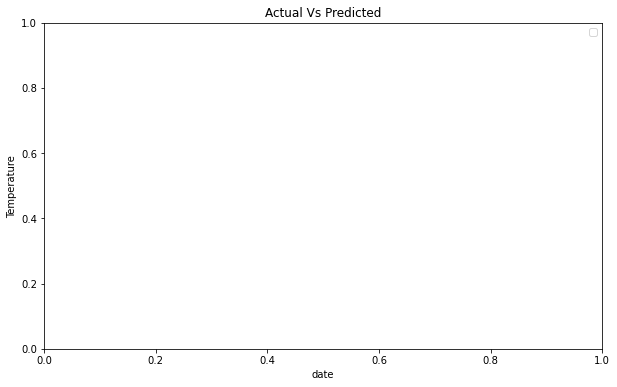

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Reference array
x = np.linspace(0, 10, 100)

# Data arrays
y1 = np.sin(x)
y2 = np.cos(x)

# Plotting
plt.plot(x, y1, label='y1 = sin(x)')
plt.plot(x, y2, label='y2 = cos(x)')
plt.figure(figsize=(10, 6))
# Add labels and title
plt.xlabel('date')
plt.ylabel('Temperature')
plt.title('Actual Vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()


# for Linear regression


0       0.002897
1       0.003622
2       0.003175
3       0.002791
4       0.001849
          ...   
4208    0.004189
4209    0.005090
4210    0.004982
4211    0.004134
4212    0.003524
Name: e_error_temp_LR, Length: 4213, dtype: float64
1.1581468841846151e-07
0.017310304584900425
-------
No. of times error goes above:  5e-06 --> 4208
Accuracy of Model : 0.11868027533823522
*********
No. of times error goes above:  5e-05 --> 4182
Accuracy of Model : 0.7358177070970697
*********
No. of times error goes above:  0.0005 --> 3943
Accuracy of Model : 6.408734868264901
*********
No. of times error goes above:  0.005 --> 1001
Accuracy of Model : 76.2402088772846
*********
No. of times error goes above:  0.006 --> 550
Accuracy of Model : 86.94516971279373
*********
No. of times error goes above:  0.007 --> 248
Accuracy of Model : 94.11345834322336
*********
No. of times error goes above:  0.008 --> 135
Accuracy of Model : 96.79563256586755
*********
No. of times error goes above:  0.009 --> 80

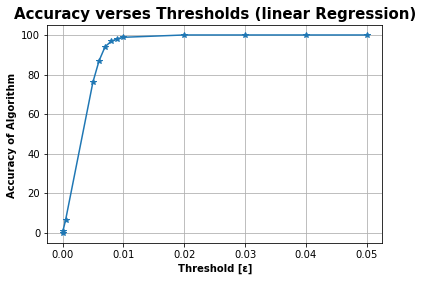

In [173]:
date=graph_data.iloc[:,0]
error= graph_data.iloc[:,23]
print(error)
#plt.xlabel(("date and time "))
#plt.ylabel("Relative Error")
#plt.title("Relative error as Threshold")
#plt.plot(date,error,marker="o",color="b")
#plt.grid()
##plt.xticks(rotation="45")
##plt.savefig('accuracy.eps',format="eps")
#plt.show()
count=0
print(min(error))
print(max(error))
print('-------')
accuracy_=[]
j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
for c in j:
  for i in error:
      if i>c:
             count+=1
            
  print("No. of times error goes above: ",c,"-->",count)  
  accuracy = (count/4213)*100
  print("Accuracy of Model :",100-accuracy)
  accuracy_.append(100-accuracy)
  #print(accuracy_)
  print('*********')
  count=0
#print(accuracy_)  
#accuracy_=list(accuracy_.__reversed__())   
#print(accuracy_)
print('Maximum point of 100% accuracy',max(error),'therefore tolorence of Model is :',0.05-max(error))  
combined__=pd.concat([pd.Series(j),pd.Series(accuracy_)],axis=1)
combined__.columns=["_Range_","accuracy"]
print(combined__)
df=pd.DataFrame(combined__)
df.to_csv("Accuracy_on_diffrent_valueo_of_thresholds.csv")
dta= pd.read_csv('Accuracy_on_diffrent_valueo_of_thresholds.csv')
print(dta.iloc[:,1])
print(dta.iloc[:,2])
plt.plot(dta.iloc[:,1],dta.iloc[:,2],linestyle='-',marker='*')
plt.grid()
plt.xlabel('Threshold [ɛ]',fontweight='bold')
plt.ylabel('Accuracy of Algorithm ',fontweight='bold')
plt.title("Accuracy verses Thresholds (linear Regression)",fontweight='bold',fontsize=15)
plt.savefig("Accuracy_on_thresholds_LR.eps")
plt.show()

# for Ridge Regression

0       0.002897
1       0.003621
2       0.003175
3       0.002791
4       0.001848
          ...   
4208    0.004189
4209    0.005089
4210    0.004982
4211    0.004134
4212    0.003524
Name: e_error_temp_RR, Length: 4213, dtype: float64
1.527266475346316e-07
0.01730915618026515
-------
No. of times error goes above:  5e-06 --> 4209
Accuracy of Model : 0.09494422027059102
*********
No. of times error goes above:  5e-05 --> 4182
Accuracy of Model : 0.7358177070970697
*********
No. of times error goes above:  0.0005 --> 3943
Accuracy of Model : 6.408734868264901
*********
No. of times error goes above:  0.005 --> 1001
Accuracy of Model : 76.2402088772846
*********
No. of times error goes above:  0.006 --> 550
Accuracy of Model : 86.94516971279373
*********
No. of times error goes above:  0.007 --> 248
Accuracy of Model : 94.11345834322336
*********
No. of times error goes above:  0.008 --> 135
Accuracy of Model : 96.79563256586755
*********
No. of times error goes above:  0.009 --> 80
A

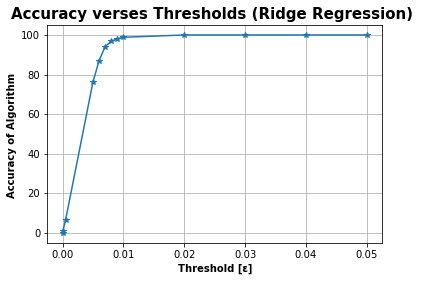

In [285]:
date=graph_data.iloc[:,0]
error= graph_data.iloc[:,21]
print(error)
#plt.xlabel(("date and time "))
#plt.ylabel("Relative Error")
#plt.title("Relative error as Threshold")
#plt.plot(date,error,marker="o",color="b")
#plt.grid()
##plt.xticks(rotation="45")
##plt.savefig('accuracy.eps',format="eps")
#plt.show()
count=0
print(min(error))
print(max(error))
print('-------')
accuracy_=[]
j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
for c in j:
  for i in error:
      if i>c:
             count+=1
            
  print("No. of times error goes above: ",c,"-->",count)  
  accuracy = (count/4213)*100
  print("Accuracy of Model :",100-accuracy)
  accuracy_.append(100-accuracy)
  #print(accuracy_)
  print('*********')
  count=0
#print(accuracy_)  
#accuracy_=list(accuracy_.__reversed__())   
#print(accuracy_)
print('Maximum point of 100% accuracy',max(error),'therefore tolorence of Model is :',0.05-max(error))  
combined__=pd.concat([pd.Series(j),pd.Series(accuracy_)],axis=1)
combined__.columns=["_Range_","accuracy"]
print(combined__)
df=pd.DataFrame(combined__)
df.to_csv("Accuracy_on_diffrent_valueo_of_thresholds_CLF.csv")
dta= pd.read_csv('Accuracy_on_diffrent_valueo_of_thresholds_CLF.csv')
print(dta.iloc[:,1])
print(dta.iloc[:,2])
plt.plot(dta.iloc[:,1],dta.iloc[:,2],linestyle='-',marker='*')
plt.grid()
plt.xlabel('Threshold [ɛ]',fontweight='bold')
plt.ylabel('Accuracy of Algorithm ',fontweight='bold')
plt.title("Accuracy verses Thresholds (Ridge Regression) ",fontweight='bold',fontsize=15)
plt.savefig("Accuracy_on_thresholds_RR.eps")
plt.show()

# For Decision Tree

0       0.017825
1       0.026380
2       0.030387
3       0.021953
4       0.034970
          ...   
4208    0.025451
4209    0.017516
4210    0.034262
4211    0.046948
4212    0.036837
Name: e_error_temp_clf, Length: 4213, dtype: float64
1.5944866954247827e-05
0.2067291479920633
-------
No. of times error goes above:  5e-06 --> 4213
Accuracy of Model : 0.0
*********
No. of times error goes above:  5e-05 --> 4210
Accuracy of Model : 0.07120816520294682
*********
No. of times error goes above:  0.0005 --> 4189
Accuracy of Model : 0.5696653216235461
*********
No. of times error goes above:  0.005 --> 3743
Accuracy of Model : 11.155945881794452
*********
No. of times error goes above:  0.006 --> 3630
Accuracy of Model : 13.838120104438644
*********
No. of times error goes above:  0.007 --> 3535
Accuracy of Model : 16.09304533586517
*********
No. of times error goes above:  0.008 --> 3431
Accuracy of Model : 18.56159506290055
*********
No. of times error goes above:  0.009 --> 3339
Accura

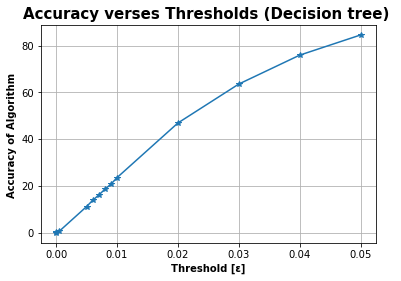

In [286]:
date=graph_data.iloc[:,0]
error= graph_data.iloc[:,25]
print(error)
#plt.xlabel(("date and time "))
#plt.ylabel("Relative Error")
#plt.title("Relative error as Threshold")
#plt.plot(date,error,marker="o",color="b")
#plt.grid()
##plt.xticks(rotation="45")
##plt.savefig('accuracy.eps',format="eps")
#plt.show()
count=0
print(min(error))
print(max(error))
print('-------')
accuracy_=[]
j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
for c in j:
  for i in error:
      if i>c:
             count+=1
            
  print("No. of times error goes above: ",c,"-->",count)  
  accuracy = (count/4213)*100
  print("Accuracy of Model :",100-accuracy)
  accuracy_.append(100-accuracy)
  #print(accuracy_)
  print('*********')
  count=0
#print(accuracy_)  
#accuracy_=list(accuracy_.__reversed__())   
#print(accuracy_)
print('Maximum point of 100% accuracy',max(error),'therefore tolorence of Model is :',0.05-max(error))  
combined__=pd.concat([pd.Series(j),pd.Series(accuracy_)],axis=1)
combined__.columns=["_Range_","accuracy"]
print(combined__)
df=pd.DataFrame(combined__)
df.to_csv("Accuracy_on_diffrent_valueo_of_thresholds_CLF.csv")
dta= pd.read_csv('Accuracy_on_diffrent_valueo_of_thresholds_CLF.csv')
print(dta.iloc[:,1])
print(dta.iloc[:,2])
plt.plot(dta.iloc[:,1],dta.iloc[:,2],linestyle='-',marker='*')
plt.grid()
plt.xlabel('Threshold [ɛ]',fontweight='bold')
plt.ylabel('Accuracy of Algorithm ',fontweight='bold')
plt.title("Accuracy verses Thresholds (Decision tree) ",fontweight='bold',fontsize=15)
plt.savefig("Accuracy_on_thresholds_clf.eps")
plt.show()

# For SVM

0       0.010156
1       0.009539
2       0.006937
3       0.010158
4       0.009497
          ...   
4208    0.001668
4209    0.001195
4210    0.009021
4211    0.007175
4212    0.006046
Name: e_error_temp_svm, Length: 4213, dtype: float64
5.149075957156929e-06
0.16806362512097775
-------
No. of times error goes above:  5e-06 --> 4213
Accuracy of Model : 0.0
*********
No. of times error goes above:  5e-05 --> 4196
Accuracy of Model : 0.4035129361500083
*********
No. of times error goes above:  0.0005 --> 4051
Accuracy of Model : 3.8452409209589433
*********
No. of times error goes above:  0.005 --> 2771
Accuracy of Model : 34.22739140754807
*********
No. of times error goes above:  0.006 --> 2452
Accuracy of Model : 41.7991929741277
*********
No. of times error goes above:  0.007 --> 2152
Accuracy of Model : 48.920009494422025
*********
No. of times error goes above:  0.008 --> 1855
Accuracy of Model : 55.96961784951341
*********
No. of times error goes above:  0.009 --> 1563
Accuracy 

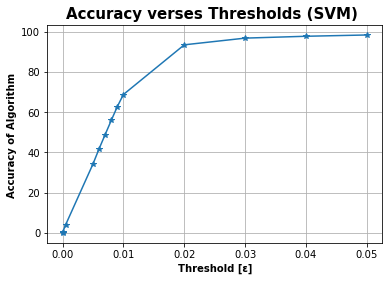

In [176]:
date=graph_data.iloc[:,0]
error= graph_data.iloc[:,26]
print(error)
#plt.xlabel(("date and time "))
#plt.ylabel("Relative Error")
#plt.title("Relative error as Threshold")
#plt.plot(date,error,marker="o",color="b")
#plt.grid()
##plt.xticks(rotation="45")
##plt.savefig('accuracy.eps',format="eps")
#plt.show()
count=0
print(min(error))
print(max(error))
print('-------')
accuracy_=[]
j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
for c in j:
  for i in error:
      if i>c:
             count+=1
            
  print("No. of times error goes above: ",c,"-->",count)  
  accuracy = (count/4213)*100
  print("Accuracy of Model :",100-accuracy)
  accuracy_.append(100-accuracy)
  #print(accuracy_)
  print('*********')
  count=0
#print(accuracy_)  
#accuracy_=list(accuracy_.__reversed__())   
#print(accuracy_)
print('Maximum point of 100% accuracy',max(error),'therefore tolorence of Model is :',0.05-max(error))  
combined__=pd.concat([pd.Series(j),pd.Series(accuracy_)],axis=1)
combined__.columns=["_Range_","accuracy"]
print(combined__)
df=pd.DataFrame(combined__)
df.to_csv("Accuracy_on_diffrent_valueo_of_thresholds_SVM.csv")
dta= pd.read_csv('Accuracy_on_diffrent_valueo_of_thresholds_SVM.csv')
print(dta.iloc[:,1])
print(dta.iloc[:,2])
plt.plot(dta.iloc[:,1],dta.iloc[:,2],linestyle='-',marker='*')
plt.grid()
plt.xlabel('Threshold [ɛ]',fontweight='bold')
plt.ylabel('Accuracy of Algorithm ',fontweight='bold')
plt.title("Accuracy verses Thresholds (SVM) ",fontweight='bold',fontsize=15)
plt.savefig("Accuracy_on_thresholds_svm.eps")
plt.show()

# For Ensemble

0       0.008521
1       0.010490
2       0.003998
3       0.001375
4       0.005132
          ...   
4208    0.003925
4209    0.006684
4210    0.005320
4211    0.011675
4212    0.009177
Name: e_error_temp_vreg, Length: 4213, dtype: float64
2.1509836196580656e-06
0.0885288764599481
-------
No. of times error goes above:  5e-06 --> 4211
Accuracy of Model : 0.0474721101352884
*********
No. of times error goes above:  5e-05 --> 4194
Accuracy of Model : 0.4509850462853109
*********
No. of times error goes above:  0.0005 --> 4027
Accuracy of Model : 4.414906242582489
*********
No. of times error goes above:  0.005 --> 2549
Accuracy of Model : 39.49679563256586
*********
No. of times error goes above:  0.006 --> 2272
Accuracy of Model : 46.0716828863043
*********
No. of times error goes above:  0.007 --> 1995
Accuracy of Model : 52.646570140042726
*********
No. of times error goes above:  0.008 --> 1707
Accuracy of Model : 59.48255399952528
*********
No. of times error goes above:  0.009 -->

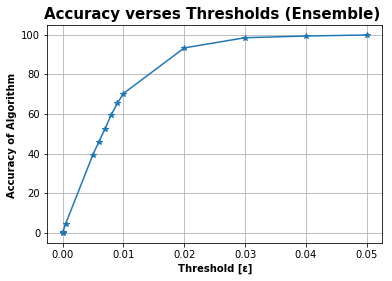

In [177]:
date=graph_data.iloc[:,0]
error= graph_data.iloc[:,27]
print(error)
#plt.xlabel(("date and time "))
#plt.ylabel("Relative Error")
#plt.title("Relative error as Threshold")
#plt.plot(date,error,marker="o",color="b")
#plt.grid()
##plt.xticks(rotation="45")
##plt.savefig('accuracy.eps',format="eps")
#plt.show()
count=0
print(min(error))
print(max(error))
print('-------')
accuracy_=[]
j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
for c in j:
  for i in error:
      if i>c:
             count+=1
            
  print("No. of times error goes above: ",c,"-->",count)  
  accuracy = (count/4213)*100
  print("Accuracy of Model :",100-accuracy)
  accuracy_.append(100-accuracy)
  #print(accuracy_)
  print('*********')
  count=0
#print(accuracy_)  
#accuracy_=list(accuracy_.__reversed__())   
#print(accuracy_)
print('Maximum point of 100% accuracy',max(error),'therefore tolorence of Model is :',0.05-max(error))  
combined__=pd.concat([pd.Series(j),pd.Series(accuracy_)],axis=1)
combined__.columns=["_Range_","accuracy"]
print(combined__)
df=pd.DataFrame(combined__)
df.to_csv("Accuracy_on_diffrent_valueo_of_thresholds_vreg.csv")
dta= pd.read_csv('Accuracy_on_diffrent_valueo_of_thresholds_vreg.csv')
print(dta.iloc[:,1])
print(dta.iloc[:,2])
plt.plot(dta.iloc[:,1],dta.iloc[:,2],linestyle='-',marker='*')
plt.grid()
plt.xlabel('Threshold [ɛ]',fontweight='bold')
plt.ylabel('Accuracy of Algorithm ',fontweight='bold')
plt.title("Accuracy verses Thresholds (Ensemble) ",fontweight='bold',fontsize=15)
plt.savefig("Accuracy_on_thresholds_vreg.eps")
plt.show()

In [178]:
threshold= graph_data.iloc[1:,15]
print(threshold)
print(min(threshold))
print(max(threshold))

1       0.730549
2       0.808686
3       0.551624
4       0.459114
5       0.447088
          ...   
4208    0.409035
4209    0.540487
4210    0.517557
4211    0.377886
4212    0.271145
Name: diff_Hum_RR, Length: 4212, dtype: float64
4.2452312570162576e-05
1.5813830004608749


In [179]:
count=0
for i in threshold:
    if i < 0.02:
        continue
    else:
        count+=1

print(count)

4059


In [180]:
#import matplotlib.pyplot as plt
#error= graph_data.iloc[:,11]
#date= graph_data.iloc[:,0]
#plt.plot(date,error)



0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: Unnamed: 8, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: Unnamed: 9, dtype: float64
   Thresholds  average_frequency_if_model_send_weights_perDAY_perHour\n 
0      0.0005                                           2.975282        
1       0.005                                           2.953390        
2        0.01                                           2.801554        
3        0.02                                           2.603107        
4        0.05                                           2.210452        
5        0.06                                           0.726695        
6        0.07                                           0.393362        
7        0.08                                           0.183616        
8        0.09                                           0.088277        
9     

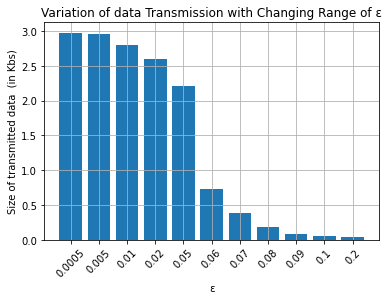

In [181]:
import pandas as pd 
eval= pd.read_csv("Performance_evaluation.csv")
#print(eval)
#j=[0.000005,0.00005,0.0005,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05]
size= eval.iloc[0:11,2]
error_range=eval.iloc[0:11,0]
power_without_model= eval.iloc[0:11,-2]
power_with_model= eval.iloc[0:11,-3]
print(power_with_model)
print(power_without_model)
comb=pd.concat([pd.Series(error_range),pd.Series(size)],axis=1)
print(comb)
#print(size)
plt.bar(error_range,size)
plt.grid()
plt.xticks(rotation="45")
plt.xlabel(' ɛ')
plt.ylabel('Size of transmitted data  (in Kbs)')
plt.title("Variation of data Transmission with Changing Range of ɛ")
plt.savefig('epsillonVstransmission.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


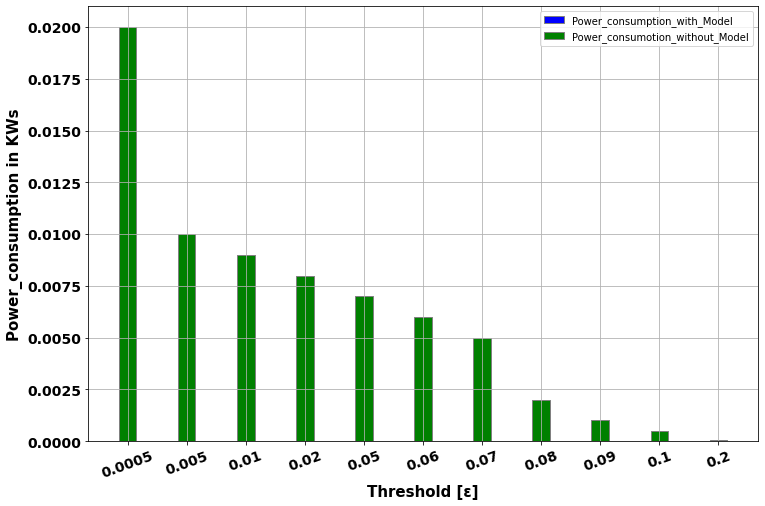

In [182]:
power_without_model= eval.iloc[0:11,-1]
power_with_model= eval.iloc[0:11,-2]
threshold1= eval.iloc[0:11,0]
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]


 
# Set position of bar on X axis
br1 = np.arange(len(power_with_model))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, power_with_model, color ='b', width = barWidth,
        edgecolor ='grey', label ='Power_consumption_with_Model')
plt.bar(br2, power_without_model, color ='g', width = barWidth,
        edgecolor ='grey', label ='Power_consumotion_without_Model')
#plt.bar(br3, CSE, color ='b', width = barWidth,
#        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Threshold [ɛ]', fontweight ='bold', fontsize = 15)
plt.ylabel('Power_consumption in KWs', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(threshold1))],
        ['0.0005','0.005','0.01','0.02','0.05','0.06','0.07','0.08','0.09','0.1','0.2'],fontweight='bold',fontsize=14,rotation=20)
plt.yticks(fontweight='bold',fontsize=14)
plt.grid()
plt.legend()
plt.savefig('Power_consumption_plot.eps',format='eps') 

plt.show()

0     0.0005
1      0.005
2       0.01
3       0.02
4       0.05
5       0.06
6       0.07
7       0.08
8       0.09
9        0.1
10       0.2
11       0.3
Name: Thresholds, dtype: object
0       0.000000
1       0.735818
2       5.839070
3      12.508901
4      25.706148
5      75.575599
6      86.779017
7      93.828626
8      97.032993
9      98.219796
10     98.741989
11    100.000000
Name: % reduction in data Transmission(when 2 predictors), dtype: float64
['0.2', '0.3']
[98.74198908, 100.0]


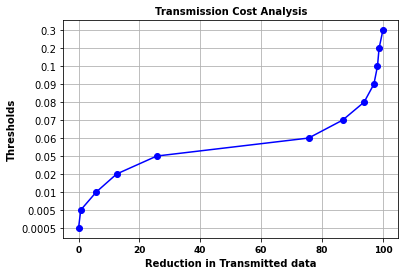

In [183]:
import matplotlib.pyplot as plt
thresholds=eval.iloc[0:12,0]
size= eval.iloc[0:12,4]

print(thresholds)
print(size)
marker_=[]
value=[]

count=0
for j in thresholds:
    if float(j) >=0.2:
        marker_.append(j)
        value.append(size[count])
        
    count+=1 
print(marker_)
print(value)           
plt.plot(size,thresholds,linestyle="-",color="b",marker="o")
plt.scatter(value,marker_,color="r",marker="*")
plt.xticks(fontweight= 'bold',fontsize=9)
plt.title("Transmission Cost Analysis",fontweight= 'bold',fontsize=10)
plt.ylabel("Thresholds",fontweight= 'bold',fontsize=10)
plt.xlabel("Reduction in Transmitted data",fontweight= 'bold',fontsize=10)
plt.grid()
plt.savefig('reduction_graph.eps',format='eps')
plt.show()

0     0.0005
1      0.005
2       0.01
3       0.02
4       0.05
5       0.06
6       0.07
7       0.08
8       0.09
9        0.1
10       0.2
Name: Thresholds, dtype: object
0         72.8571
1     72.31395681
2     68.59623785
3     63.73726562
4     54.12307146
5     17.79317589
6     9.631485879
7     4.495846191
8     2.161464515
9     1.296878709
10    0.916460954
Name: Size of data transmission(in Kb's)(2 predictors), dtype: object


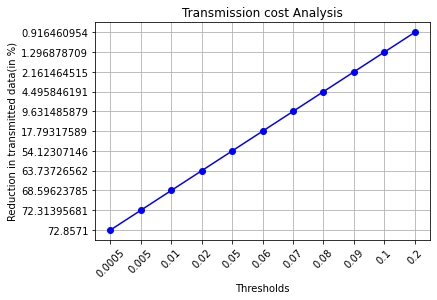

In [184]:
reduction=eval.iloc[0:11,3]
thresholds=eval.iloc[0:11,0]
print(thresholds)
print(reduction)
plt.xlabel(("Thresholds"))
plt.ylabel("Reduction in transmitted data(in %)")
plt.title("Transmission cost Analysis")
plt.plot(thresholds,reduction,marker="o",color="b")
plt.grid()
plt.xticks(rotation="45")
plt.savefig('transmission_cost.eps',format="eps")
plt.show()

# Accuracy plot
* Linear Regression 
* Ridge Regression
* Decision Tree
* SVM
* Ensemble tree

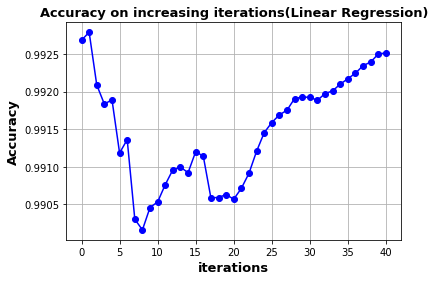

In [305]:
import pandas as pd
accuracy= pd.read_csv("D:\Mayank\ML_prediction\model_accuracy_temp_LR.csv")
iterations=accuracy.iloc[:,0]
accuracy_score_LR=accuracy.iloc[:,1]
#print(iterations)
#print(accuracy_score)
plt.xlabel("iterations",fontweight= 'bold',fontsize=13)
plt.ylabel("Accuracy",fontweight= 'bold',fontsize=13)
plt.title("Accuracy on increasing iterations(Linear Regression)",fontweight= 'bold',fontsize=13)
plt.plot(iterations,accuracy_score_LR,marker="o",color="b")
plt.grid()
#plt.xticks(rotation="45")
plt.savefig('accuracy_LR.eps',format="eps")
plt.show()

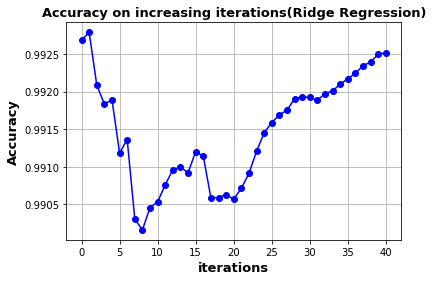

In [306]:
import pandas as pd
accuracy= pd.read_csv("D:\Mayank\ML_prediction\model_accuracy_temp_RR.csv")
iterations=accuracy.iloc[:,0]
accuracy_score_RR=accuracy.iloc[:,1]
#print(iterations)
#print(accuracy_score)
plt.xlabel("iterations",fontweight= 'bold',fontsize=13)
plt.ylabel("Accuracy",fontweight= 'bold',fontsize=13)
plt.title("Accuracy on increasing iterations(Ridge Regression)",fontweight= 'bold',fontsize=13)
plt.plot(iterations,accuracy_score_RR,marker="o",color="b")
plt.grid()
#plt.xticks(rotation="45")
plt.savefig('accuracy_RR.eps',format="eps")
plt.show()

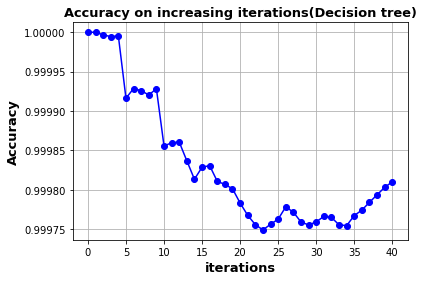

In [304]:
import pandas as pd
accuracy= pd.read_csv("D:\Mayank\ML_prediction\model_accuracy_temp_CLF.csv")
iterations=accuracy.iloc[:,0]
accuracy_score_CLF=accuracy.iloc[:,1]
#print(iterations)
#print(accuracy_score)
plt.xlabel("iterations",fontweight= 'bold',fontsize=13)
plt.ylabel("Accuracy",fontweight= 'bold',fontsize=13)
plt.title("Accuracy on increasing iterations(Decision tree)",fontweight= 'bold',fontsize=13)
plt.plot(iterations,accuracy_score_CLF,marker="o",color="b")
plt.grid()
#plt.xticks(rotation="45")
plt.savefig('accuracy_CLF.eps',format="eps")
plt.show()

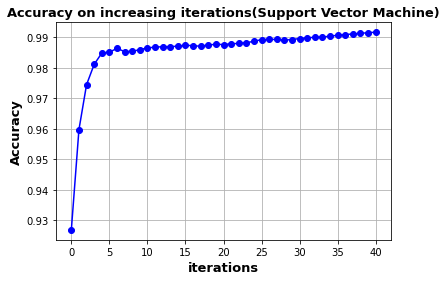

In [303]:
import pandas as pd
accuracy= pd.read_csv("D:\Mayank\ML_prediction\model_accuracy_temp_SVM.csv")
iterations=accuracy.iloc[:,0]
accuracy_score_SVM=accuracy.iloc[:,1]
#print(iterations)
#print(accuracy_score)
plt.xlabel("iterations",fontweight= 'bold',fontsize=13)
plt.ylabel("Accuracy",fontweight= 'bold',fontsize=13)
plt.title("Accuracy on increasing iterations(Support Vector Machine)",fontweight='bold', fontsize=13)
plt.plot(iterations,accuracy_score_SVM,marker="o",color="b")
plt.grid()
#plt.xticks(rotation="45")
plt.savefig('accuracy_SVM.eps',format="eps")
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(lr_model[0])
lr_model_no_quant_tflite = converter.convert()

# Save the model to disk
open('D:\Mayank\ML_prediction', "wb").write(lr_model_no_quant_tflite)



In [ ]:
import tensorflow as tf

def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model,
                                    experimental_op_resolver_type=tf.lite.experimental.OpResolverType.BUILTIN_REF)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [222]:
test_data=pd.read_csv("D:\Mayank\ML_prediction\DATA_collected_IIITDM.csv")
test_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Device1 Time Stamp (IST),Soil Moisture,Humidity,Temperature,NaN,DEVICE 2 Time stamp (IST),Soil Moisture,Humidity,Temperature
1,21/08/2023 16:22:00,50,72,31,NaN,21/08/2023 16:21:57,61,74,34
2,21/08/2023 16:22:32,61,69,31,NaN,21/08/2023 16:22:29,61,70,34
3,21/08/2023 16:23:04,63,71,31,NaN,21/08/2023 16:23:01,61,70,34
4,21/08/2023 16:23:36,66,68,31,NaN,21/08/2023 16:23:33,61,69,34
...,...,...,...,...,...,...,...,...,...
4016,25/08/2023 12:57:26,87,76,39,NaN,25/08/2023 12:57:30,76,77,30
4017,25/08/2023 12:57:57,87,67,38,NaN,25/08/2023 12:58:01,76,77,30
4018,25/08/2023 12:58:28,87,75,38,NaN,25/08/2023 12:58:32,76,76,30
4019,25/08/2023 12:58:59,87,83,38,NaN,25/08/2023 12:59:03,76,76,30


In [252]:
temp=test_data.iloc[1:40,3]
humidity= test_data.iloc[:,2]
temp


1     31
2     31
3     31
4     31
5     33
6     32
7     31
8     31
9     33
10    32
11    32
12    33
13    31
14    31
15    31
16    32
17    32
18    31
19    31
20    31
21    31
22    33
23    31
24    32
25    32
26    32
27    32
28    32
29    32
30    31
31    31
32    31
33    31
34    33
35    31
36    31
37    32
38    32
39    31
Name: Unnamed: 3, dtype: object

In [238]:
test1=test_data.iloc[1:40,[3,2]]
test1

,Unnamed: 3,Unnamed: 2
1,31,72
2,31,69
3,31,71
4,31,68
5,33,72
6,32,72
7,31,72
8,31,68
9,33,72
10,32,72


In [243]:

preds=lr1.predict(test1)
preds = pd.Series(preds)
preds

0     31.079497
1     31.063211
2     31.074068
3     31.057782
4     33.102242
5     32.090870
6     31.079497
7     31.057782
8     33.102242
9     32.090870
10    32.090870
11    33.085957
12    31.063211
13    31.074068
14    31.057782
15    32.090870
16    32.090870
17    31.079497
18    31.063211
19    31.074068
20    31.057782
21    33.102242
22    31.079497
23    32.090870
24    32.069155
25    32.090870
26    32.090870
27    32.090870
28    32.074584
29    31.074068
30    31.074068
31    31.074068
32    31.063211
33    33.085957
34    31.063211
35    31.074068
36    32.085441
37    32.085441
38    31.074068
dtype: float64

In [254]:

combined_1= pd.concat([temp,preds],axis=1)
combined_1.columns= ['Original_temp','predicted_temp']
df=pd.DataFrame(combined_1)
df.to_csv("lr_soria.csv")

    Unnamed: 0  Original_temp  predicted_temp
0            0            NaN       31.079497
1            1           31.0       31.063211
2            2           31.0       31.074068
3            3           31.0       31.057782
4            4           31.0       33.102242
5            5           33.0       32.090870
6            6           32.0       31.079497
7            7           31.0       31.057782
8            8           31.0       33.102242
9            9           33.0       32.090870
10          10           32.0       32.090870
11          11           32.0       33.085957
12          12           33.0       31.063211
13          13           31.0       31.074068
14          14           31.0       31.057782
15          15           31.0       32.090870
16          16           32.0       32.090870
17          17           32.0       31.079497
18          18           31.0       31.063211
19          19           31.0       31.074068
20          20           31.0     

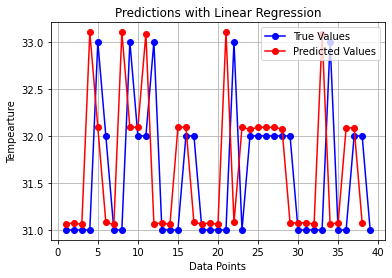

<Figure size 360x360 with 0 Axes>

In [270]:
import pandas as pd
temperature= pd.read_csv("D:\Mayank\ML_prediction\lr_soria.csv")
print(temperature)
data_readings=temperature.iloc[1:,0]
original=temperature.iloc[1:,1]
predictions_LR=temperature.iloc[1:,2]
#print(iterations)
#print(accuracy_score)
plt.xlabel(("Data Points"))
plt.ylabel("Tempearture")
plt.title("Predictions with Linear Regression")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_LR,marker="o",color="r",label='Predicted Values')
plt.grid()
plt.legend()
#plt.xticks(rotation="45")
plt.figure(figsize=(5,5))
plt.savefig('predictions_LR.eps',format="eps")
plt.show()

In [264]:

preds=rr1.predict(test1)
preds = pd.Series(preds)
preds

combined_1= pd.concat([temp,preds],axis=1)
combined_1.columns= ['Original_temp','predicted_temp']
df=pd.DataFrame(combined_1)
df.to_csv("Rr_soria.csv")

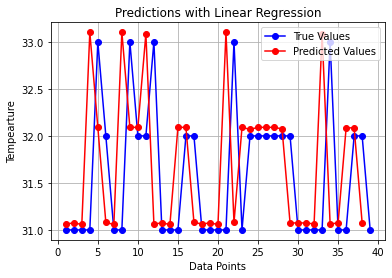

<Figure size 360x360 with 0 Axes>

In [272]:
import pandas as pd
temperature= pd.read_csv("D:\Mayank\ML_prediction\Rr_soria.csv")
#print(temperature)
data_readings=temperature.iloc[1:,0]
original=temperature.iloc[1:,1]
predictions_RR=temperature.iloc[1:,2]
#print(iterations)
#print(accuracy_score)
plt.xlabel(("Data Points"))
plt.ylabel("Tempearture")
plt.title("Predictions with Linear Regression")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_RR,marker="o",color="r",label='Predicted Values')
plt.grid()
plt.legend()
#plt.xticks(rotation="45")
plt.figure(figsize=(5,5))
plt.savefig('predictions_RR.eps',format="eps")
plt.show()

In [266]:

preds=clf.predict(test1)
preds = pd.Series(preds)
preds

combined_1= pd.concat([temp,preds],axis=1)
combined_1.columns= ['Original_temp','predicted_temp']
df=pd.DataFrame(combined_1)
df.to_csv("CLF_soria.csv")

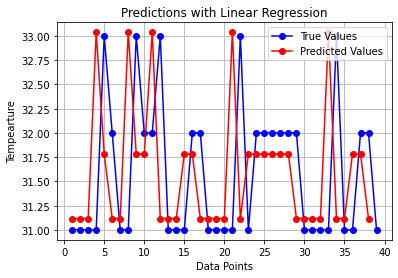

<Figure size 360x360 with 0 Axes>

In [273]:
import pandas as pd
temperature= pd.read_csv("D:\Mayank\ML_prediction\CLF_soria.csv")
#print(temperature)
data_readings=temperature.iloc[1:,0]
original=temperature.iloc[1:,1]
predictions_CLF=temperature.iloc[1:,2]
#print(iterations)
#print(accuracy_score)
plt.xlabel(("Data Points"))
plt.ylabel("Tempearture")
plt.title("Predictions with Linear Regression")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_CLF,marker="o",color="r",label='Predicted Values')
plt.grid()
plt.legend()
#plt.xticks(rotation="45")
plt.figure(figsize=(5,5))
plt.savefig('predictions_CLF.eps',format="eps")
plt.show()

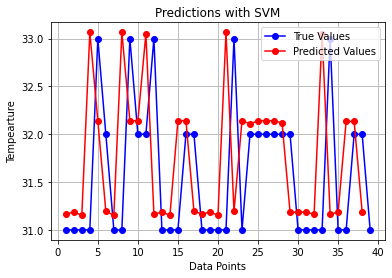

<Figure size 360x360 with 0 Axes>

In [274]:

preds=svgr.predict(test1)
preds = pd.Series(preds)
preds

combined_1= pd.concat([temp,preds],axis=1)
combined_1.columns= ['Original_temp','predicted_temp']
df=pd.DataFrame(combined_1)
df.to_csv("SVM_soria.csv")
import pandas as pd
temperature= pd.read_csv("D:\Mayank\ML_prediction\SVM_soria.csv")
#print(temperature)
data_readings=temperature.iloc[1:,0]
original=temperature.iloc[1:,1]
predictions_SVM=temperature.iloc[1:,2]
#print(iterations)
#print(accuracy_score)
plt.xlabel(("Data Points"))
plt.ylabel("Tempearture")
plt.title("Predictions with SVM")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_SVM,marker="o",color="r",label='Predicted Values')
plt.grid()
plt.legend()
#plt.xticks(rotation="45")
plt.figure(figsize=(5,5))
plt.savefig('predictions_SVM.eps',format="eps")
plt.show()

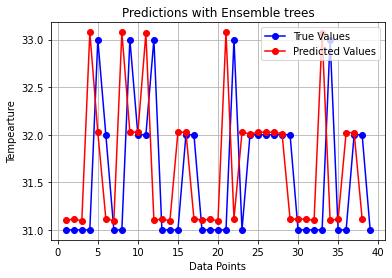

<Figure size 360x360 with 0 Axes>

In [275]:

preds=vreg.predict(test1)
preds = pd.Series(preds)
preds

combined_1= pd.concat([temp,preds],axis=1)
combined_1.columns= ['Original_temp','predicted_temp']
df=pd.DataFrame(combined_1)
df.to_csv("VREG_soria.csv")
import pandas as pd
temperature= pd.read_csv("D:\Mayank\ML_prediction\VREG_soria.csv")
#print(temperature)
data_readings=temperature.iloc[1:,0]
original=temperature.iloc[1:,1]
predictions_VREG=temperature.iloc[1:,2]
#print(iterations)
#print(accuracy_score)
plt.xlabel(("Data Points"))
plt.ylabel("Tempearture")
plt.title("Predictions with Ensemble trees")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_VREG,marker="o",color="r",label='Predicted Values')
plt.grid()
plt.legend()
#plt.xticks(rotation="45")
plt.figure(figsize=(5,5))
plt.savefig('predictions_VREG.eps',format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


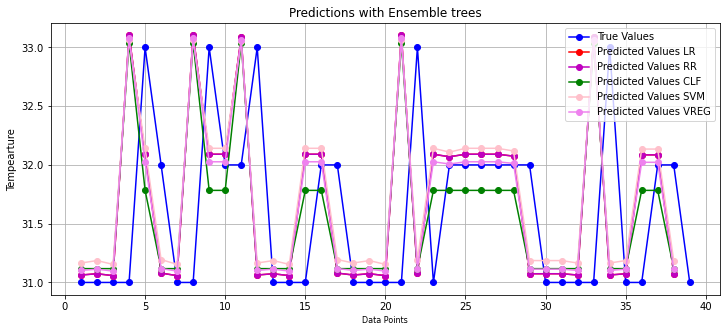

In [293]:

plt.figure(figsize=(12,5))

plt.title("Predictions with Ensemble trees")
plt.plot(data_readings,original,marker="o",color="b",label='True Values')
plt.plot(data_readings,predictions_LR,marker="o",color="r",label='Predicted Values LR')
plt.plot(data_readings,predictions_RR,marker="o",color="m",label='Predicted Values RR')
plt.plot(data_readings,predictions_CLF,marker="o",color="g",label='Predicted Values CLF')
plt.plot(data_readings,predictions_SVM,marker="o",color="pink",label='Predicted Values SVM')
plt.plot(data_readings,predictions_VREG,marker="o",color="violet",label='Predicted Values VREG')
plt.grid()
plt.legend()
plt.xlabel(("Data Points"),size=8)
plt.ylabel("Tempearture",size=10)
#plt.xticks(rotation="45")

plt.savefig('predictions_of_all_models.eps',format="eps")
plt.show()